In [31]:
#import required libraries
import pandas as pd
import numpy as np

#read the dataset using pandas
dataset = pd.read_csv('Final.csv')

dataset.head()

,Mean_R,RMS_R,Median_R,Variance_R,Std_R,Skewness_R,Kurtosis_R,Contrast_R,Entropy_R,Energy_R,...,Skewness_B,Kurtosis_B,Contrast_B,Entropy_B,Energy_B,Homogeneity_B,Correlation_B,IDM_B,Smoothness_B,Label
0,0.499272,0.530498,0.521569,0.032156,0.179320,-0.484763,-0.322512,7.417660,956.450061,0.010660,...,-0.407196,-0.696663,7.517717,946.369715,0.011527,0.075315,0.824158,0.001056,0.014440,0
1,0.450862,0.493341,0.482412,0.040108,0.200270,-0.025098,-1.355651,7.058108,360.687224,0.015127,...,0.163490,-1.162955,7.040838,359.933441,0.015140,0.094008,0.919477,0.002771,0.005492,0
2,0.490711,0.529387,0.552941,0.039453,0.198628,-0.561403,-0.793254,7.469795,604.175751,0.010409,...,-0.467573,-1.005314,7.497503,601.133165,0.010352,0.060593,0.896033,0.001661,0.009172,0
3,0.456121,0.516174,0.470588,0.058389,0.241638,-0.111255,-1.422784,7.603757,787.841958,0.011805,...,-0.061711,-1.496490,7.352011,770.710692,0.018813,0.113546,0.885132,0.001296,0.011759,0
4,0.666764,0.680847,0.701961,0.018978,0.137762,-0.641985,-0.495426,6.970347,147.902145,0.018236,...,-0.336407,-1.415606,7.252476,151.646691,0.017100,0.140658,0.974893,0.006552,0.002314,0


In [32]:
#find no of output variable
dataset['Label'].value_counts()

1    620
0    430
Name: Label, dtype: int64

In [33]:
#now find info about dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Mean_R         1050 non-null   float64
 1   RMS_R          1050 non-null   float64
 2   Median_R       1050 non-null   float64
 3   Variance_R     1050 non-null   float64
 4   Std_R          1050 non-null   float64
 5   Skewness_R     1050 non-null   float64
 6   Kurtosis_R     1050 non-null   float64
 7   Contrast_R     1050 non-null   float64
 8   Entropy_R      1050 non-null   float64
 9   Energy_R       1050 non-null   float64
 10  Homogeneity_R  1050 non-null   float64
 11  Correlation_R  1050 non-null   float64
 12  IDM_R          1050 non-null   float64
 13  Smoothness_R   1050 non-null   float64
 14  Mean_G         1050 non-null   float64
 15  RMS_G          1050 non-null   float64
 16  Median_G       1050 non-null   float64
 17  Variance_G     1050 non-null   float64
 18  Std_G   

In [34]:
#distribute data into dependent and independent variables x and y
x = dataset.iloc[:, : -1]
y = dataset.iloc[:, -1]
x.head()

,Mean_R,RMS_R,Median_R,Variance_R,Std_R,Skewness_R,Kurtosis_R,Contrast_R,Entropy_R,Energy_R,...,Std_B,Skewness_B,Kurtosis_B,Contrast_B,Entropy_B,Energy_B,Homogeneity_B,Correlation_B,IDM_B,Smoothness_B
0,0.499272,0.530498,0.521569,0.032156,0.179320,-0.484763,-0.322512,7.417660,956.450061,0.010660,...,0.203257,-0.407196,-0.696663,7.517717,946.369715,0.011527,0.075315,0.824158,0.001056,0.014440
1,0.450862,0.493341,0.482412,0.040108,0.200270,-0.025098,-1.355651,7.058108,360.687224,0.015127,...,0.185545,0.163490,-1.162955,7.040838,359.933441,0.015140,0.094008,0.919477,0.002771,0.005492
2,0.490711,0.529387,0.552941,0.039453,0.198628,-0.561403,-0.793254,7.469795,604.175751,0.010409,...,0.210727,-0.467573,-1.005314,7.497503,601.133165,0.010352,0.060593,0.896033,0.001661,0.009172
3,0.456121,0.516174,0.470588,0.058389,0.241638,-0.111255,-1.422784,7.603757,787.841958,0.011805,...,0.227122,-0.061711,-1.496490,7.352011,770.710692,0.018813,0.113546,0.885132,0.001296,0.011759
4,0.666764,0.680847,0.701961,0.018978,0.137762,-0.641985,-0.495426,6.970347,147.902145,0.018236,...,0.215415,-0.336407,-1.415606,7.252476,151.646691,0.017100,0.140658,0.974893,0.006552,0.002314


In [35]:
#split data into training and testing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.17, random_state=0)


#scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#lets now apply lightGBM
import lightgbm as lgb
lgb_classifier = lgb.LGBMClassifier()
lgb_classifier.fit(x_train, y_train)

#predict using model
pred = lgb_classifier.predict(x_test)

#now find accuracy
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy is ", accuracy_score(pred, y_test))
print(classification_report(pred, y_test))

Accuracy is  0.9664804469273743
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        85
           1       0.94      1.00      0.97        94

    accuracy                           0.97       179
   macro avg       0.97      0.96      0.97       179
weighted avg       0.97      0.97      0.97       179



In [36]:
#now test the accuracy x_train data

x_train_pred = lgb_classifier.predict(x_train)

print("The accuracy for train data is ", accuracy_score(y_train, x_train_pred))

The accuracy for train data is  1.0


[[79  6]
 [ 0 94]]


<Axes: >

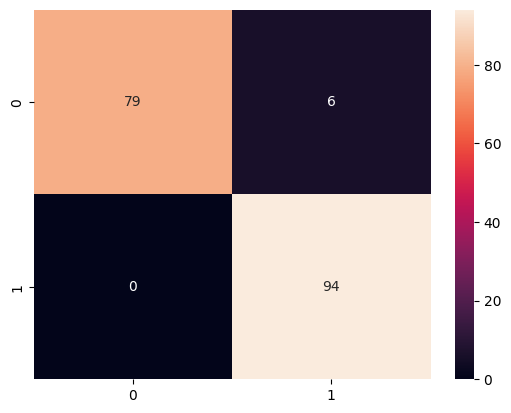

In [39]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(pred, y_test)
print(cm)

#create a heatmap to analyze the results
import seaborn as sb
sb.heatmap(cm, annot=True)

[Text(0, 0.5, 'Health'), Text(0, 1.5, 'Unhealthy')]

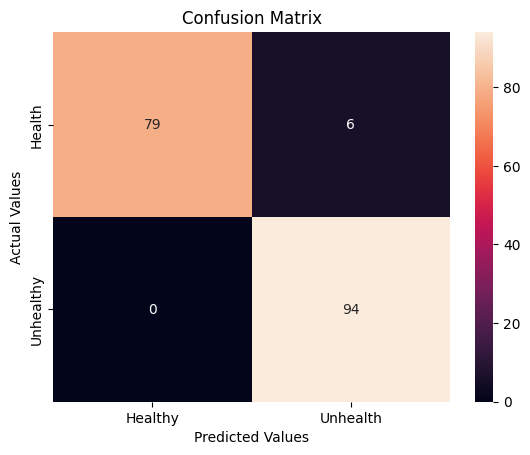

In [40]:
#now confusion matrix with labels
import matplotlib.pyplot as plt

ax= plt.subplot()
sb.heatmap(cm, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Values');ax.set_ylabel('Actual Values')
ax.xaxis.set_ticklabels(['Healthy', 'Unhealth']); ax.yaxis.set_ticklabels(['Health', 'Unhealthy'])

<Axes: >

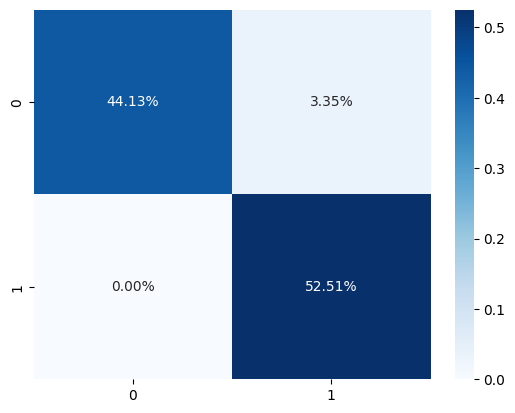

In [41]:
sb.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')